           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

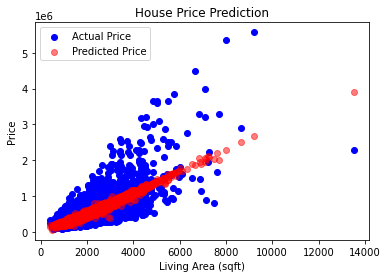

In [2]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv('kc_house_data.csv')
print(df.head())

# 3. Feature Selection
X = df[['sqft_living', 'bedrooms', 'bathrooms']]
y = df['price']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Prediction
y_pred = model.predict(X_test)

# 7. Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: ${mse**0.5:.2f}")
print(f"R² Score: {r2:.2f}")

# 8. Visualization
plt.scatter(X_test['sqft_living'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['sqft_living'], y_pred, color='red', alpha=0.5, label='Predicted Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()